In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
import itertools
from statsmodels.tsa.x13 import x13_arima_select_order
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf

In [62]:
df = pd.read_csv('salsas_ventas_year_month2.csv')

In [63]:
df

,date,year,month,id_sku,sku,cases
0,20121101,2012,11,000000000000600000,Servicio de Flete,1.0
1,20121101,2012,11,CAL043785P01E01,Amor Limon 3785 C4 Nac,32.0
2,20121101,2012,11,CAL121000P01E01,Amor Limon 1000 C12 Nac,1300.0
3,20121101,2012,11,CAL200355P01E01,Amor Limon 355 C20 Nac,493.0
4,20121101,2012,11,CAM043785P01E01,Amor 3785 C4 Nac,4682.0
...,...,...,...,...,...,...
6154,20200101,2020,1,PCSO021000P02E01,Sonora 1000 C12 Nac 2pack,672.0
6155,20200101,2020,1,PCSO043785P04E01,Sonora 3785 C4 Nac Charola,360.0
6156,20200101,2020,1,PCSO060355P06E01,Sonora 355 C24 Nac 6pack,630.0
6157,20200101,2020,1,PCSY030150P03E01,Pekin 150 C24 Nac 3pack,61.0


In [64]:
df['id_sku_len'] = df['id_sku'].str.len()

In [65]:
df

,date,year,month,id_sku,sku,cases,id_sku_len
0,20121101,2012,11,000000000000600000,Servicio de Flete,1.0,18.0
1,20121101,2012,11,CAL043785P01E01,Amor Limon 3785 C4 Nac,32.0,15.0
2,20121101,2012,11,CAL121000P01E01,Amor Limon 1000 C12 Nac,1300.0,15.0
3,20121101,2012,11,CAL200355P01E01,Amor Limon 355 C20 Nac,493.0,15.0
4,20121101,2012,11,CAM043785P01E01,Amor 3785 C4 Nac,4682.0,15.0
...,...,...,...,...,...,...,...
6154,20200101,2020,1,PCSO021000P02E01,Sonora 1000 C12 Nac 2pack,672.0,16.0
6155,20200101,2020,1,PCSO043785P04E01,Sonora 3785 C4 Nac Charola,360.0,16.0
6156,20200101,2020,1,PCSO060355P06E01,Sonora 355 C24 Nac 6pack,630.0,16.0
6157,20200101,2020,1,PCSY030150P03E01,Pekin 150 C24 Nac 3pack,61.0,16.0


In [66]:
df = df.drop(df[df['id_sku_len'] == 18.0].index)

In [67]:
df

,date,year,month,id_sku,sku,cases,id_sku_len
1,20121101,2012,11,CAL043785P01E01,Amor Limon 3785 C4 Nac,32.0,15.0
2,20121101,2012,11,CAL121000P01E01,Amor Limon 1000 C12 Nac,1300.0,15.0
3,20121101,2012,11,CAL200355P01E01,Amor Limon 355 C20 Nac,493.0,15.0
4,20121101,2012,11,CAM043785P01E01,Amor 3785 C4 Nac,4682.0,15.0
5,20121101,2012,11,CAM043785P01E02,Amor 3785 C4 Exp,48.0,15.0
...,...,...,...,...,...,...,...
6154,20200101,2020,1,PCSO021000P02E01,Sonora 1000 C12 Nac 2pack,672.0,16.0
6155,20200101,2020,1,PCSO043785P04E01,Sonora 3785 C4 Nac Charola,360.0,16.0
6156,20200101,2020,1,PCSO060355P06E01,Sonora 355 C24 Nac 6pack,630.0,16.0
6157,20200101,2020,1,PCSY030150P03E01,Pekin 150 C24 Nac 3pack,61.0,16.0


In [68]:
df_null = df.loc[df['sku'].isnull()]

In [69]:
df_null

,date,year,month,id_sku,sku,cases,id_sku_len
65,20121101,2012,11,NaN,NaN,0.0,NaN
337,20130301,2013,3,NaN,NaN,0.0,NaN
855,20131001,2013,10,NaN,NaN,0.0,NaN
1472,20140701,2014,7,NaN,NaN,0.0,NaN
4979,20181001,2018,10,NaN,NaN,0.0,NaN
5272,20190201,2019,2,NaN,NaN,0.0,NaN


In [70]:
df = df.dropna()

In [71]:
df

,date,year,month,id_sku,sku,cases,id_sku_len
1,20121101,2012,11,CAL043785P01E01,Amor Limon 3785 C4 Nac,32.0,15.0
2,20121101,2012,11,CAL121000P01E01,Amor Limon 1000 C12 Nac,1300.0,15.0
3,20121101,2012,11,CAL200355P01E01,Amor Limon 355 C20 Nac,493.0,15.0
4,20121101,2012,11,CAM043785P01E01,Amor 3785 C4 Nac,4682.0,15.0
5,20121101,2012,11,CAM043785P01E02,Amor 3785 C4 Exp,48.0,15.0
...,...,...,...,...,...,...,...
6154,20200101,2020,1,PCSO021000P02E01,Sonora 1000 C12 Nac 2pack,672.0,16.0
6155,20200101,2020,1,PCSO043785P04E01,Sonora 3785 C4 Nac Charola,360.0,16.0
6156,20200101,2020,1,PCSO060355P06E01,Sonora 355 C24 Nac 6pack,630.0,16.0
6157,20200101,2020,1,PCSY030150P03E01,Pekin 150 C24 Nac 3pack,61.0,16.0


In [72]:
warnings.filterwarnings("ignore") 
df.id_sku = pd.Categorical(df.id_sku)

In [73]:
df['code_sku'] = df.id_sku.cat.codes

In [74]:
df

,date,year,month,id_sku,sku,cases,id_sku_len,code_sku
1,20121101,2012,11,CAL043785P01E01,Amor Limon 3785 C4 Nac,32.0,15.0,6
2,20121101,2012,11,CAL121000P01E01,Amor Limon 1000 C12 Nac,1300.0,15.0,7
3,20121101,2012,11,CAL200355P01E01,Amor Limon 355 C20 Nac,493.0,15.0,9
4,20121101,2012,11,CAM043785P01E01,Amor 3785 C4 Nac,4682.0,15.0,13
5,20121101,2012,11,CAM043785P01E02,Amor 3785 C4 Exp,48.0,15.0,14
...,...,...,...,...,...,...,...,...
6154,20200101,2020,1,PCSO021000P02E01,Sonora 1000 C12 Nac 2pack,672.0,16.0,177
6155,20200101,2020,1,PCSO043785P04E01,Sonora 3785 C4 Nac Charola,360.0,16.0,178
6156,20200101,2020,1,PCSO060355P06E01,Sonora 355 C24 Nac 6pack,630.0,16.0,179
6157,20200101,2020,1,PCSY030150P03E01,Pekin 150 C24 Nac 3pack,61.0,16.0,180


In [75]:
df = df.drop(['year','month','id_sku','id_sku_len','sku'], 1)

In [76]:
df

,date,cases,code_sku
1,20121101,32.0,6
2,20121101,1300.0,7
3,20121101,493.0,9
4,20121101,4682.0,13
5,20121101,48.0,14
...,...,...,...
6154,20200101,672.0,177
6155,20200101,360.0,178
6156,20200101,630.0,179
6157,20200101,61.0,180


In [77]:
sku = df.loc[df.code_sku == 74]

In [78]:
sku

,date,cases,code_sku
24,20121101,9307.000,74
88,20121201,10010.000,74
143,20130101,11941.000,74
214,20130201,11353.000,74
287,20130301,12109.000,74
...,...,...,...
5796,20190901,14175.837,74
5883,20191001,13634.918,74
5959,20191101,13172.416,74
6039,20191201,10923.584,74


In [79]:
sku = sku.drop('code_sku',1)

In [80]:
sku

,date,cases
24,20121101,9307.000
88,20121201,10010.000
143,20130101,11941.000
214,20130201,11353.000
287,20130301,12109.000
...,...,...
5796,20190901,14175.837
5883,20191001,13634.918
5959,20191101,13172.416
6039,20191201,10923.584


In [81]:
sku.date = pd.to_datetime(sku.date, format = '%Y%m%d')

In [82]:
sku = sku.set_index('date')

In [83]:
sku

,cases
date,
2012-11-01,9307.000
2012-12-01,10010.000
2013-01-01,11941.000
2013-02-01,11353.000
2013-03-01,12109.000
...,...
2019-09-01,14175.837
2019-10-01,13634.918
2019-11-01,13172.416


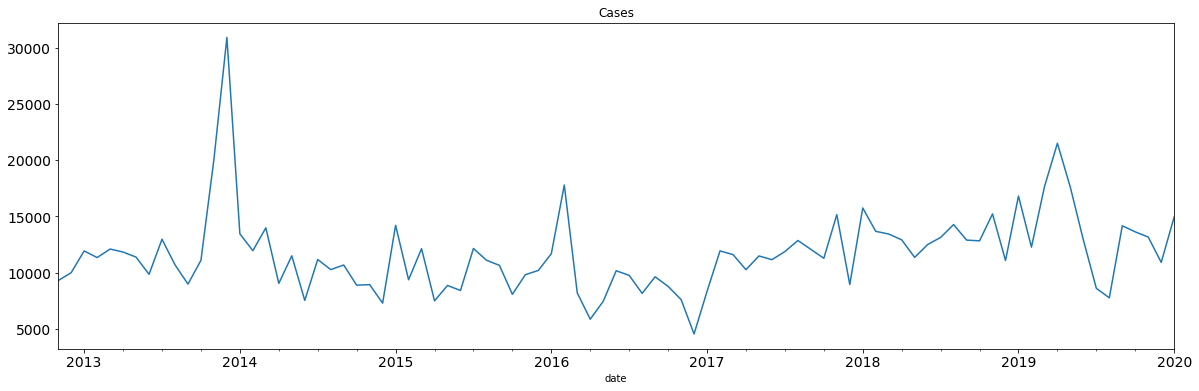

In [84]:
sku.cases.plot(figsize = (20,6), title = 'Cases', fontsize = 14)
plt.show()

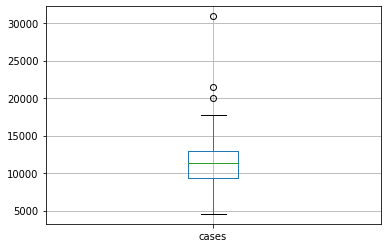

In [85]:
sku.boxplot('cases', figsize = (6,4))

In [86]:
print(sku.quantile([0.25,0.5,0.75,1]))
Q1_sku = sku.cases.quantile (0.25)
Q3_sku = sku.cases.quantile (0.75)
IQR = Q3_sku - Q1_sku

           cases
0.25   9344.5000
0.50  11368.3750
0.75  12952.4375
1.00  30903.0000


In [87]:
outliers = sku.query('(@Q1_sku - 1.5 * @IQR) <= cases <= (@Q3_sku + 1.5 * @IQR)')

In [88]:
outliers

,cases
date,
2012-11-01,9307.000
2012-12-01,10010.000
2013-01-01,11941.000
2013-02-01,11353.000
2013-03-01,12109.000
...,...
2019-09-01,14175.837
2019-10-01,13634.918
2019-11-01,13172.416


In [89]:
mean = outliers.cases.mean()
mean

11257.293035714287

In [90]:
print(Q1_sku - 1.5 * IQR, Q3_sku + 1.5 * IQR)

3932.59375 18364.34375


In [91]:
outliers_index = sku.query('(@Q1_sku - 1.5 * @IQR) > cases | cases > (@Q3_sku + 1.5 * @IQR)').index

In [92]:
sku[sku.index.isin(outliers_index)]

,cases
date,
2013-11-01,20073.000
2013-12-01,30903.000
2019-04-01,21506.784


In [93]:
sku_normalized = sku

In [94]:
sku_normalized.loc[outliers_index, 'cases'] = 11257

In [95]:
sku_normalized[sku_normalized.index.isin(outliers_index)]

,cases
date,
2013-11-01,11257.0
2013-12-01,11257.0
2019-04-01,11257.0


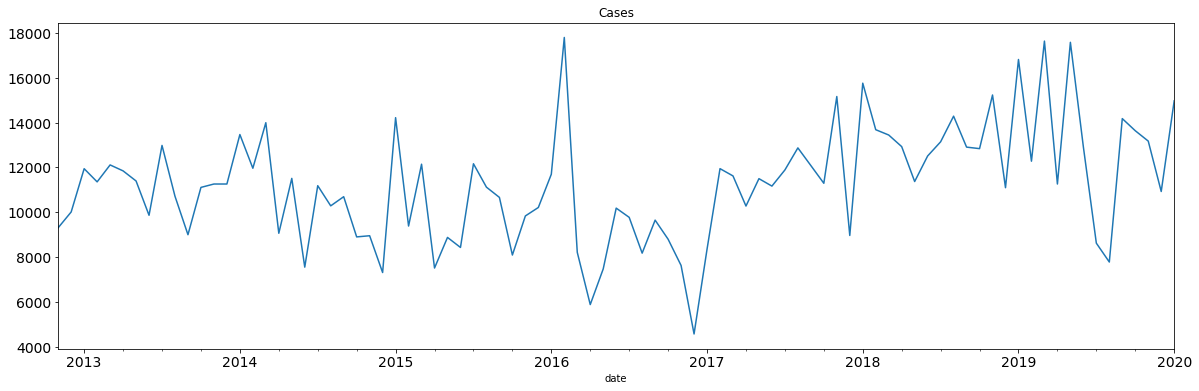

In [96]:
sku_normalized.cases.plot(figsize = (20,6), title = 'Cases', fontsize = 14)
plt.show()

<Figure size 432x288 with 0 Axes>

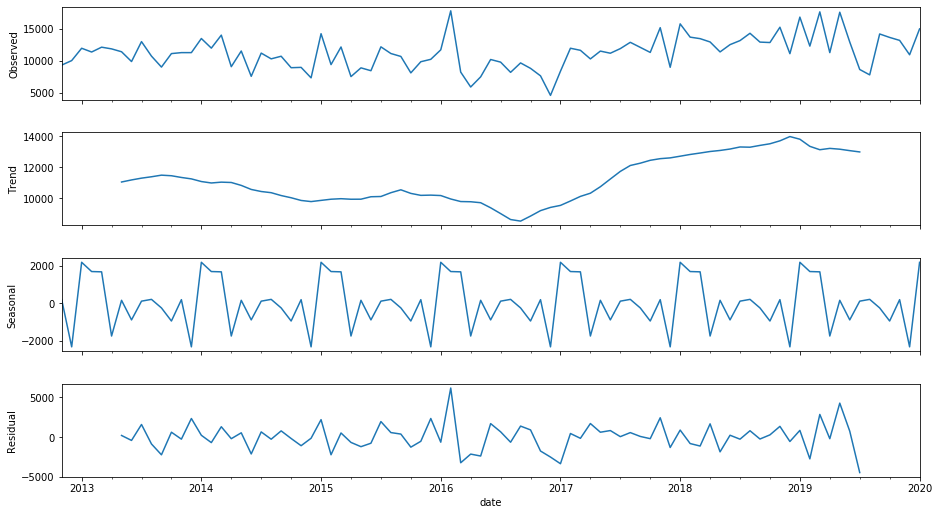

In [97]:
decomposition = seasonal_decompose(sku_normalized.cases, freq = 12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15,8)

In [98]:
p = d = q = range(1,3)

In [99]:
pdq = list(itertools.product(p,d,q))
print(pdq)

[(1, 1, 1), (1, 1, 2), (1, 2, 1), (1, 2, 2), (2, 1, 1), (2, 1, 2), (2, 2, 1), (2, 2, 2)]


In [100]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

In [101]:
print('Examples of parameters combinations for seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameters combinations for seasonal ARIMA...
SARIMAX: (1, 1, 2) x (1, 1, 2, 12)
SARIMAX: (1, 1, 2) x (1, 2, 1, 12)
SARIMAX: (1, 2, 1) x (1, 2, 2, 12)
SARIMAX: (1, 2, 1) x (2, 1, 1, 12)


In [102]:
y = sku_normalized.cases

In [103]:
c3 = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)
            
            results = mod.fit()
            
            c3.append(results.aic)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1120.3743789997998
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:2153.065462952817
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:923.5985932893141
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:924.8671532705778
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:909.86857464377
ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:711.128853687962
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:1107.7103250466278
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:1831.5511653249428
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:900.0492477076717
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:926.8493806833643
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:888.4796363517709
ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:714.2654357287753
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:1129.1357912156125
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:902.6299519218053
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:914.6664876866706
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:925.417404961717
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:904.5832664625301
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:699.5516439176224
ARIMA(1, 2

In [104]:
index_min = np.argmin(c3)
np.min(c3)

683.2012045711454

In [105]:
index_min

41

In [106]:
c3[index_min]

683.2012045711454

In [107]:
c4 = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order = param,
                                            seasonal_order = param_seasonal,
                                            enforce_stationarity = False,
                                            enforce_invertibility = False)
            
            results = mod.fit()
            
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            c4.append('ARIMA{}X{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1120.3743789997998
ARIMA(1, 1, 1)x(1, 1, 2, 12)12 - AIC:2153.065462952817
ARIMA(1, 1, 1)x(1, 2, 1, 12)12 - AIC:923.5985932893141
ARIMA(1, 1, 1)x(2, 1, 1, 12)12 - AIC:924.8671532705778
ARIMA(1, 1, 1)x(2, 1, 2, 12)12 - AIC:909.86857464377
ARIMA(1, 1, 1)x(2, 2, 1, 12)12 - AIC:711.128853687962
ARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:1107.7103250466278
ARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:1831.5511653249428
ARIMA(1, 1, 2)x(1, 2, 1, 12)12 - AIC:900.0492477076717
ARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:926.8493806833643
ARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:888.4796363517709
ARIMA(1, 1, 2)x(2, 2, 1, 12)12 - AIC:714.2654357287753
ARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:1129.1357912156125
ARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:902.6299519218053
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:914.6664876866706
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:925.417404961717
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:904.5832664625301
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:699.5516439176224
ARIMA(1, 2

In [108]:
c4[index_min]

'ARIMA(2, 2, 1)X(2, 2, 1, 12)12 - AIC:683.2012045711454'

In [109]:
order1 = c4[index_min][6:13]
order1

'2, 2, 1'

In [110]:
seasonal_order1 = c4[index_min][16:27]
seasonal_order1

'2, 2, 1, 12'

In [111]:
order1 = [int(s) for s in seasonal_order1.split(',')]
order1

[2, 2, 1, 12]

In [112]:
mod = sm.tsa.statespace.SARIMAX(sku.cases, trend = 'n', order = [2,2,1], seasonal_order = [2,2,1,12], enforce_stationarity = False, enforce_invertibility = False)
results = mod.fit()
print (results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              cases   No. Observations:                   87
Model:             SARIMAX(2, 2, 1)x(2, 2, 1, 12)   Log Likelihood                -334.601
Date:                            Tue, 17 Mar 2020   AIC                            683.201
Time:                                    23:55:29   BIC                            694.089
Sample:                                11-01-2012   HQIC                           686.960
                                     - 01-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4468      0.168     -2.667      0.008      -0.775      -0.118
ar.L2         -0.0500      0.163   

In [113]:
results.predict(start = 80, end = 86)

2019-07-01    16418.707922
2019-08-01    11877.621742
2019-09-01     7961.503698
2019-10-01     9999.635104
2019-11-01    16930.886965
2019-12-01     9788.144754
2020-01-01    16066.448215
Freq: MS, dtype: float64

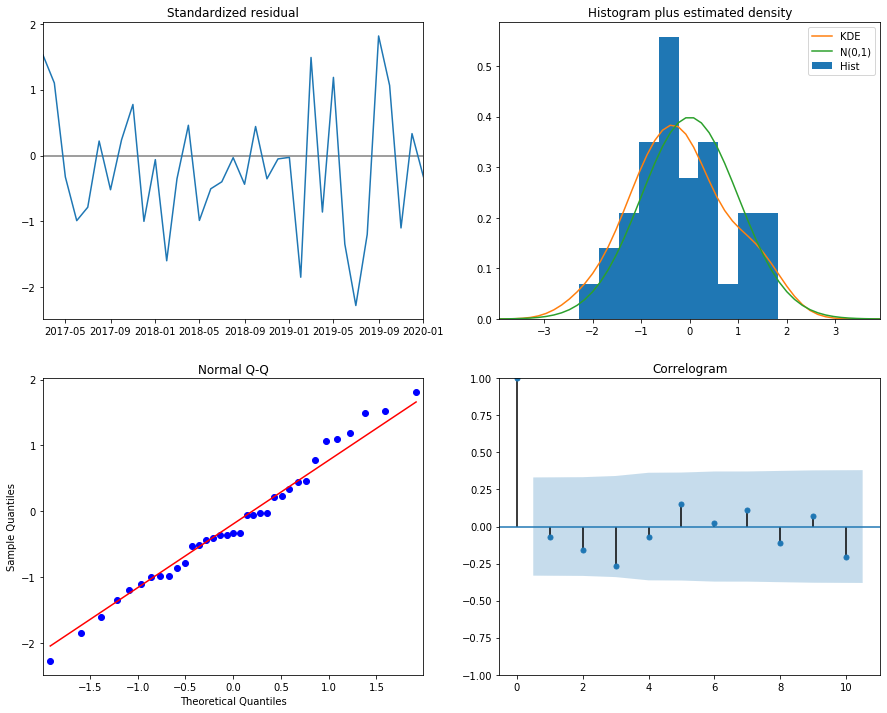

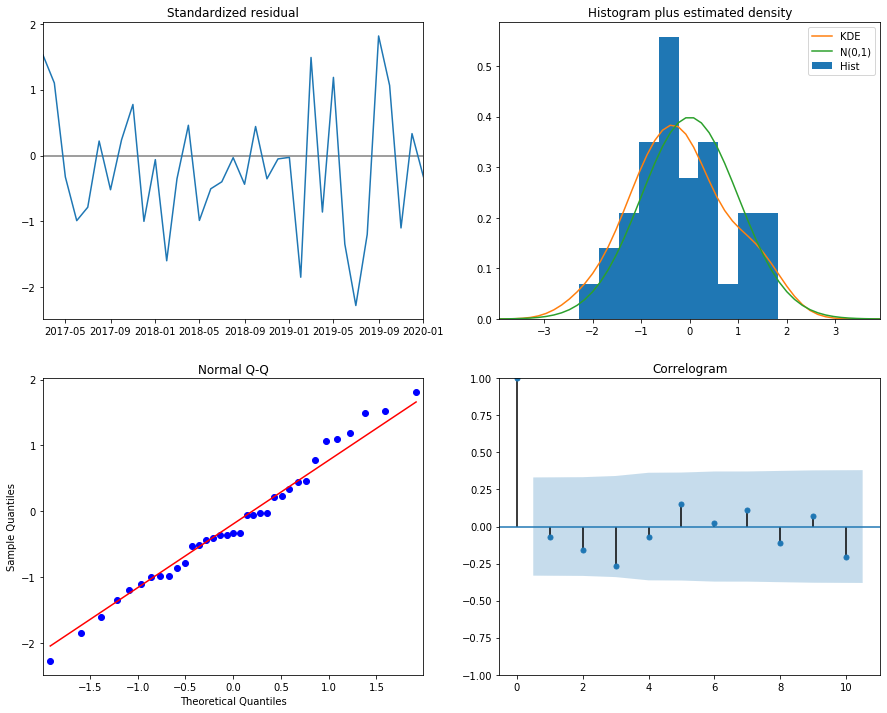

In [114]:
results.plot_diagnostics(figsize = (15,12))

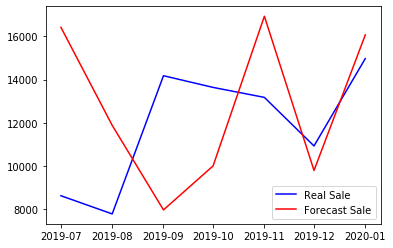

In [115]:
plt.plot(sku_normalized.cases[80:], color = 'blue', label = 'Real Sale')
plt.plot(results.predict(start = 80, end = 86), color = 'red', label = 'Forecast Sale')
plt.legend()